In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
infi = np.inf

#numbers on the left
def MaxCrossingSubarray(A,low,mid,high):
  left_sum = -infi
  sum = 0
  for i in range(mid,low-1,-1):
    sum= sum + A[i]
    if (sum>left_sum):
      left_sum=sum
      max_left=i


 #numbers on the right 
  right_sum = -infi
  sum = 0

  for j in range(mid+1,high+1):
    sum= sum + A[j]
    if (sum>right_sum):
      right_sum = sum
      max_right = j

  return (max_left, max_right, left_sum+right_sum)

In [3]:
def MaximumSubarray(A,low,high):
  #One number
  if (high==low):
    return (low, high, A[low])
  else:
    mid = (low+high)//2

    (left_low,left_high,left_sum) = MaximumSubarray(A,low,mid) #left
    (right_low,right_high,right_sum) = MaximumSubarray(A,mid+1,high) #right
    (cross_low,cross_high,cross_sum) = MaxCrossingSubarray(A,low,mid,high)

    if (left_sum>=right_sum and left_sum>=cross_sum):
      return (left_low,left_high,left_sum)
    elif (right_sum>=left_sum and right_sum>=cross_sum):
      return (right_low,right_high,right_sum)
    else:
      return (cross_low,cross_high,cross_sum)


In [7]:
n = [10, 100, 1000, 10000, 100000]

execution_time = []

for k in range(0,len(n)):
  A = np.random.randint(-100,100, n[k])
  start_time = time.time()
  (left, right, sum) = MaximumSubarray(A, 0, len(A)-1)
  execution_time.append(time.time()-start_time)

  print (A)
  print('left, right, sum --> ({},{},{})'.format(left, right, sum))

[-46  -8 -32 -89 -88  39  38  43 -57 -66]
left, right, sum --> (5,7,120)
[ 64  81  57 -44  98 -49 -11 -45  62 -85  65  77 -19 -81 -31  84  61  34
  93  28  76 -70 -85 -98   7  79 -69  90 -24  61  28  71  87 -54 -27  49
  18  18  -7 -11 -73  84  -9  76 -84  15 -55 -29  49 -33 -67 -45 -78 -46
  -1 -51  12 -63  13  90 -60 -78 -14  11  57  -2 -33 -32  88 -22 -63 -26
  33 -52  57 -84  24  46 -66 -98  -3  66  34 -73  27 -33  58 -21 -19  27
   1 -69  39 -28  32 -69  73  63 -36   3]
left, right, sum --> (0,43,656)
[ -66  -94  -37   64    5   89   97  -90   78  -38   48   23   80   63
  -62  -68   90   53   37   21  -94  -78  -36   69    0   29   65  -85
   75  -90   51    8  -77   46   31    1   65   30   87   56  -60  -62
   -6  -13  -73  -87   38   -4  -43  -87  -85   67   15  -53  -56  -27
  -47   80  -22   61   76   66   36   97   90  -83   88   14  -82  -28
  -37   13  -65   16  -17   -6  -23   54   58   91  -41   17  -31  -46
  -42   93  -25  -23   22   97  -37  -23  -31   99  -20   66  

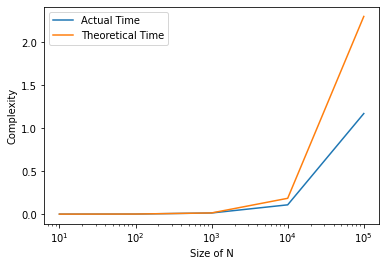

In [8]:
c= 1/500000

plt.xscale("log")

plt.xlabel('Size of N')

plt.ylabel('Complexity')

plt.plot(n, execution_time, label='Actual Time')

y_nlogn = n*(np.log(n))

y_cnlogn = [i*c for i in y_nlogn]

plt.plot(n, y_cnlogn, label='Theoretical Time')

plt.legend()


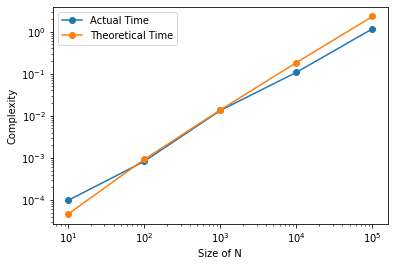

In [9]:
c= 1/500000

plt.xscale("log")
plt.yscale("log")

plt.xlabel('Size of N')

plt.ylabel('Complexity')

plt.plot(n, execution_time, marker='o', label='Actual Time')

y_nlogn = n*(np.log(n))

y_cnlogn = [i*c for i in y_nlogn]

plt.plot(n, y_cnlogn,marker='o', label='Theoretical Time')

plt.legend()
